# 시계열(Time Series) 데이터

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
'py' 'thon'

In [ ]:
#다양한 날짜 형식 데이터 변환시도

date_strings = [
    '2025년8월6일'
    '2023-01-15',
    '15/01/2023', 
    'Jan 15, 2023',
    '2023.01.15',
    '15-Jan-2023',
    '20230115'
   
]

for date in date_strings:
    #예외처리 (에러 처리)
    try:#일단 아래블럭해봐. 되면좋고 
        parsed= pd.to_datetime(date) #파싱시도 
        print(f'{date} -> {parsed}')
    except:#안되면 뻗지 말고, 아래코드 실행해 
        print('err',date)


In [44]:
# 시계열 인덱스 생성
# 날짜 범위 생성
dates_daily = pd.date_range('2023-01-01', '2023-12-31', freq='D')
dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')
dates_weekly = pd.date_range('2023-01-01', '2023-12-31', freq='W')

print(f"\n일별 날짜 (총 {len(dates_daily)}개): {dates_daily[:5].tolist()}...")
print(f"월별 날짜 (총 {len(dates_monthly)}개): {dates_monthly.tolist()}")
print(f"주별 날짜 (총 {len(dates_weekly)}개): {dates_weekly[:5].tolist()}...")

# 시계열 데이터프레임 생성
np.random.seed(42)

# 일별 매출 데이터 생성
daily_sales = pd.DataFrame({
    'date': dates_daily,
    'sales': np.random.normal(100000, 20000, len(dates_daily)) + 
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 7) * 10000 +  # 주간 패턴
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 365) * 30000   # 연간 패턴
})

# 음수 값 제거
daily_sales['sales'] = daily_sales['sales'].clip(lower=10000)

# date를 인덱스로 설정
daily_sales.set_index('date', inplace=True)

print("\n일별 매출 데이터:")
print(daily_sales.head())
daily_sales.head() #프라이머리 키가 날짜 


일별 날짜 (총 365개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00')]...
월별 날짜 (총 12개): [Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-28 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-31 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-08-31 00:00:00'), Timestamp('2023-09-30 00:00:00'), Timestamp('2023-10-31 00:00:00'), Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-31 00:00:00')]
주별 날짜 (총 53개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-29 00:00:00')]...

일별 매출 데이터:
                    sales
date                     
2023-01-01  109934.283060
2023-01-02  105569.429486
2023-01-03  123735.698233
2023-01-04  136348.024536
2023-01-05   93042.167918


/var/folders/98/vj3q9b254k79y681ng12dddh0000gn/T/ipykernel_6910/2949594252.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')


,sales
date,
2023-01-01,109934.283060
2023-01-02,105569.429486
2023-01-03,123735.698233
2023-01-04,136348.024536
2023-01-05,93042.167918


In [ ]:
daily_sales.head()

In [ ]:
#시계열 데이터
# Index (datetime index 라서 바로 접근)
daily_sales['year'] = daily_sales.index.year  # 년
daily_sales['month'] = daily_sales.index.month  # 월
daily_sales['day'] = daily_sales.index.day  # 일
daily_sales['weekday'] = daily_sales.index.weekday  # 요일, 월=0
daily_sales['weekname'] = daily_sales.index.day_name()  # 요일, 얘만 함수
daily_sales['quarter'] = daily_sales.index.quarter  # 분기

daily_sales.head()

# 요일별 평균 매출
weekday_avg = daily_sales.groupby('weekname')['sales'].mean()
# 원하는 순서대로 Series 나 DF 인덱스의 순서 바꾸기
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = weekday_avg.reindex(weekday_order)

# 시각화
plt.figure(figsize=(12, 8))
 
# 일별 매출 추이
plt.subplot(2, 2, 1)
daily_sales['sales'].plot()
plt.title('일별 매출 추이')
plt.ylabel('매출액')

# 요일별 평균매출
plt.subplot(2, 2, 2)
weekday_avg.plot(kind='bar')
plt.title('요일별 평균 매출')
plt.ylabel('평균매출액')
plt.xticks(rotation=45)

# 월별 평균 매출
plt.subplot(2, 2, 3)
monthly_avg = daily_sales.groupby('month')['sales'].mean()
monthly_avg.plot(kind='bar')
plt.title('월별 평균 매출')
plt.xlabel('월')
plt.ylabel('평균매출액')

# 분기별 매출 평균
plt.subplot(2, 2, 4)
quarter_avg = daily_sales.groupby('quarter')['sales'].mean()
quarter_avg.plot(kind='bar')
plt.title('분기별 평균 매출')
plt.xticks(rotation=0)
plt.xlabel('분기')
plt.ylabel('평균매출액')


# Layout 겹치지 않게 조정
plt.tight_layout()
plt.show()

In [ ]:
# 인덱싱 및 슬라이싱 
f'전체 데이터 기간, {daily_sales.index.min()} ~ {daily_sales.index.max()}'


In [ ]:
#특정 날짜 선택
d1= daily_sales.loc['2023-01-15']
d1['sales']

In [ ]:
#날짜 범위 선택
jan_half= daily_sales['2023-01-01': '2023-01-15']
# 데이터 개수, 매출 총합
len(jan_half), jan_half['sales'].sum()


In [ ]:
#부분 문자열 활용
daily_sales.loc['2023-04']

In [ ]:
#조건부 필터링 
daily_sales[daily_sales['weekname'] == 'Friday']

#특정 월의 주말만(6월)
june = daily_sales.loc['2023-06']
#6월 데이터만 뽑기
daily_sales.loc['2023-06']
#토, 일만 True mask 
weekend_mask = daily_sales.loc['2023-06']['weekday'].isin([5,6]) #0=월
june[weekend_mask]


In [ ]:
# 마지막 10일간의 데이터
daily_sales.tail(10)

In [ ]:
# 시각화
plt.figure(figsize=(15,10))

#전체 날짜-매출 데이터
plt.subplot(2,3,1)
daily_sales['sales'].plot()
plt.title('2023년 전체 매출 추이')
plt.ylabel('매출액')

#1월 데이터 
jan_data = daily_sales.loc['2023-01']
daily_sales['sales'].plot()
plt.title('2023년 전체 매출 추이')
plt.ylabel('매출액')

#1Q 데이터 만 뽑는 것 
Q1_data = daily_sales.loc['2023-01']
daily_sales['sales'].plot()
plt.title('2023년 전체 매출 추이')
plt.ylabel('매출액')
ge



#월별 박스플롯 
plt.Subplot(2,3,6)
print(daily_salespdailt)


In [ ]:
%pip install -q statsmodels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#시계열 데이터 추세, 계절성 분해 함수 
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#월 기준으로 리샘플링(시간 간격 재조정) 시계열 데이터는 자동으로 가능하다. 
daily_sales.resample('M')['sales'].mean()

In [ ]:
# 전체 추이
plt.subplot(3, 2, 1)
daily_sales['sales'].plot(linewidth=1, alpha=0.8)  # 두께, 투명더
plt.grid(True, alpha=0.3)  # 보조선
plt.title('2023 일별 추이')
plt.ylabel('매출액')

# 월별 평균 같이 보기
plt.subplot(3, 2, 2)
daily_sales['sales'].plot(linewidth=0.5, alpha=0.5, label='일별매출')
# 일단위 -> 월단위 간격 재조정 후 평균내기
monthly_avg = daily_sales.resample('M')['sales'].mean()
monthly_avg.plot(linewidth=3, marker='o', label='월별평균', color='red')
plt.title('일별매출 vs 월별매출')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)
plt.legend()  # 범례 표시 (label 표시)
#시계열 분해 (seasonal Decomposition)
# 계절성 패턴(분해) -> Trend(추세)-> 전반적인 방향성 (증가. 감소 ), Sesaonal(계절)-> 주기적으로 반복되는 패턴(매주 금요일 매출 증가), Resdiul(잔차 )-> 추세/계절성을 제거한 나머지 요인(갑작스런 이벤트, 노이즈)
plt.subplot(3, 2, 3) # 3행 2열에 3번쨰 

# 7일 이동평균으로 트렌드 확인 
decomp = seasonal_decompose(daily_sales['sales'], model='additive', period=7) # 덧셈모델, 주간패턴 
decomp.trend.plot()
plt.title('추세 성분')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)

#7일 이동평균으로 계절성 확인 
plt.subplot(3, 2, 4)
decomp.seasonal.plot()


#히트맵(Heatmap) - 월별, 요일별 
plt.subplot(3, 2, 5)
daily_sales.pivot_table(
    values='dales',
    index='month',
    colunms='weekday',
    aggfunc='mean'

)
sns. heatmap(pt)

plt.tight_layout()
plt.show()

#분기별 박스플롯 
plt.subplot(3, 2, 6)
sns.boxplot(x='quarter_avg')



<function matplotlib.pyplot.subplot(*args, **kwargs) -> 'Axes'>

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

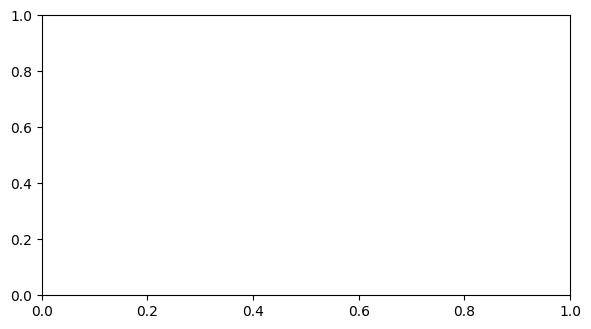

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

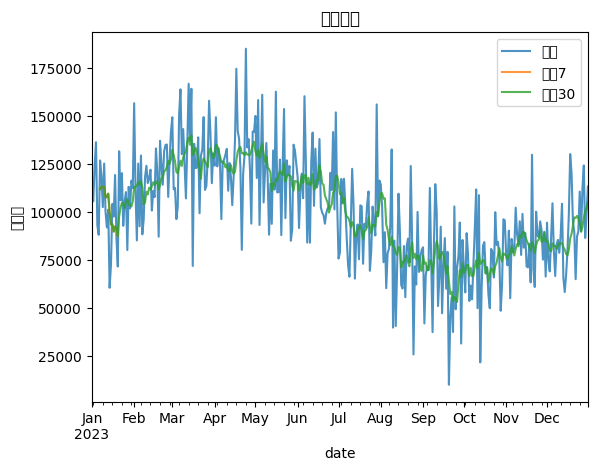

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.


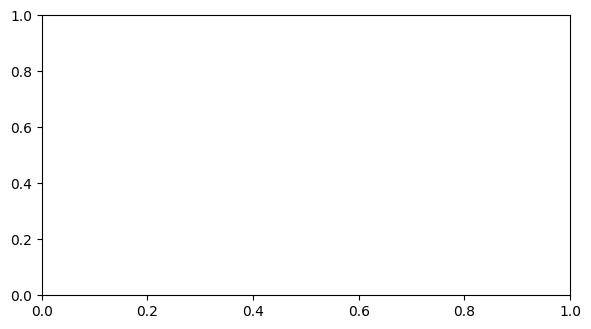

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

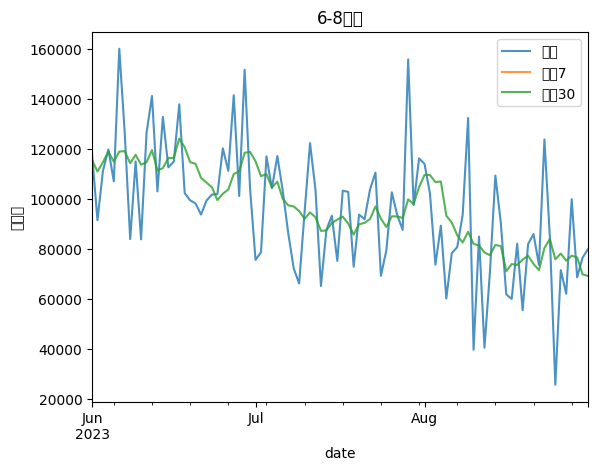

In [61]:
# 시계열 데이터 연산 
daily_sales['ma_7']= daily_sales['sales'].rolling(window=7).mean().head(20)
daily_sales['ma_30']= daily_sales['sales'].rolling(window=7).mean()
daily_sales ##모두 시계열데이터라서 가능한 것이다. 

#이동평균 시각화 
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
daily_sales[['sales', 'ma_7', 'ma_30']].plot(alpha=0.8)
plt.title('이동평균')
plt.ylabel('매출액')
plt.legend(['원본', '이평7', '이평30'])

#특정기간확대 6-8월 
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
daily_sales.loc['2023-06':'2023-08'] [['sales', 'ma_7', 'ma_30']].plot(alpha=0.8) #시계열데이터에서만 가능
plt.title('6-8상세')
plt.ylabel('매출액')
plt.legend(['원본', '이평7', '이평30'])

# 변화율 계산
daily_sales['daily_change']= daily_sales['sales'].pct_change() # 주간 변화율야
daily_sales['weekly_change'] = daily_sales['sales'].pct_change(periods=7)

plt.subplot



In [ ]:
#리샘플링(원하는 주기로 나누어 준다.)
#집계합수 (이거자체가 그룹핑 되어있기 때문에 가능)사실상 그루핑 
weekly_state= daily_sales['sales'].resample('W').agg(['sum', 'mean', 'min', 'max', 'std'])
print(weekly_state)
#주간매출총합
w_sales= daily_sales['sales'].resample('W').sum()

#월간 매출 총합
m_sales= daily_sales['sales'].resample('ME').sum()# 월 마지막날 기준 (MS)
#분기 매출 총합
q_sales= daily_sales['sales'].resample('QE').sum() #분기 마지막날 기준(QS)


                      sum           mean            min            max  \
date                                                                     
2023-01-01  109934.283060  109934.283060  109934.283060  109934.283060   
2023-01-08  792656.174213  113236.596316   88146.925701  136348.024536   
2023-01-15  654458.234884   93494.033555   60573.725672  125229.744613   
2023-01-22  717168.981301  102452.711614   71642.736702  131620.347542   
2023-01-29  724226.455078  103460.922154   80214.117106  120260.615205   
2023-02-05  799639.564093  114234.223442   85236.657445  156644.529397   
2023-02-12  788793.516512  112684.788073   88397.677253  129419.594928   
2023-02-19  782911.168433  111844.452633   87148.359524  133102.486551   
2023-02-26  885936.527228  126562.361033  107859.946135  137049.168467   
2023-03-05  840837.996950  120119.713850   96331.736850  149344.252679   
2023-03-12  955417.136581  136488.162369  107105.540591  163863.005783   
2023-03-19  921831.348974  131690.1927